In [1]:
import spotpy 
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from setup import SIRB_Setup, Results, ResultsDept
from sirb import SIRB
from misc import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib as mpl


setup = SIRB_Setup().model_dept()
t0 = datetime.date(2010, 10, 24)
t1 = datetime.date(2012, 1, 1)
t2 = datetime.date(2016, 9, 30)
t3 = datetime.date(2016, 12, 1)
dept_name = ['Artibonite','Centre', 'Grande Anse', 'Nippes', 'Nord', 'Nord-Est', 'Nord-Ouest', 'Ouest', 'Sud' ,'Sud-Est']

cases = setup.cases
rain = setup.rainfall.resample('W-SAT').sum()

pop =cases.copy(deep=True)
pop['Ouest'] = 4029705
pop['Artibonite'] = 1727524
pop['Nord'] = 1067177
pop['Sud'] = 774976
pop['Centre'] = 746236
pop['Nord-Ouest'] = 728807
pop['Sud-Est'] = 632601
pop['Grande Anse'] = 468301
pop['Nippes'] = 342525
pop['Nord-Est'] = 393967

cases.cumsum()
susceptible = pop-cases.cumsum()
irn =  (cases.shift(1)+1)/(cases+1) #instantaneous reproduction number
irn = irn.replace([np.inf, -np.inf], np.nan)
max_irn = irn.max().max()
#irn = irn.fillna(value=2*max_irn)

brn = irn * pop/susceptible


pop = 
Ouest	4 029 705 habitants	4 983 km²
Artibonite	1 727 524 habitants	4 887 km²
Nord	1 067 177 habitants	2 115 km²
Sud	774 976 habitants	2 654 km²
Centre	746 236 habitants	3 487 km²
Nord-Ouest	728 807 habitants	2 103 km²
Sud-Est	632 601 habitants	2 034 km²
Grande Anse	468 301 habitants	1 912 km²
Nord-Est	393 967 habitants	1 623 km²
Nippes	342 525 habitants	
https://www.populationdata.net/pays/haiti/
 no density -> not spatial
 Institut haïtien de statistique et d'informatique (IHSI)
 from world pop https://www.google.com/publicdata/explore?ds=d5bncppjof8f9_&met_y=sp_pop_totl&hl=fr&dl=fr#!ctype=l&strail=false&bcs=d&nselm=h&met_y=sp_pop_totl&scale_y=lin&ind_y=false&rdim=region&idim=country:HTI&ifdim=region&tstart=1278885600000&tend=1499810400000&hl=fr&dl=fr&ind=false

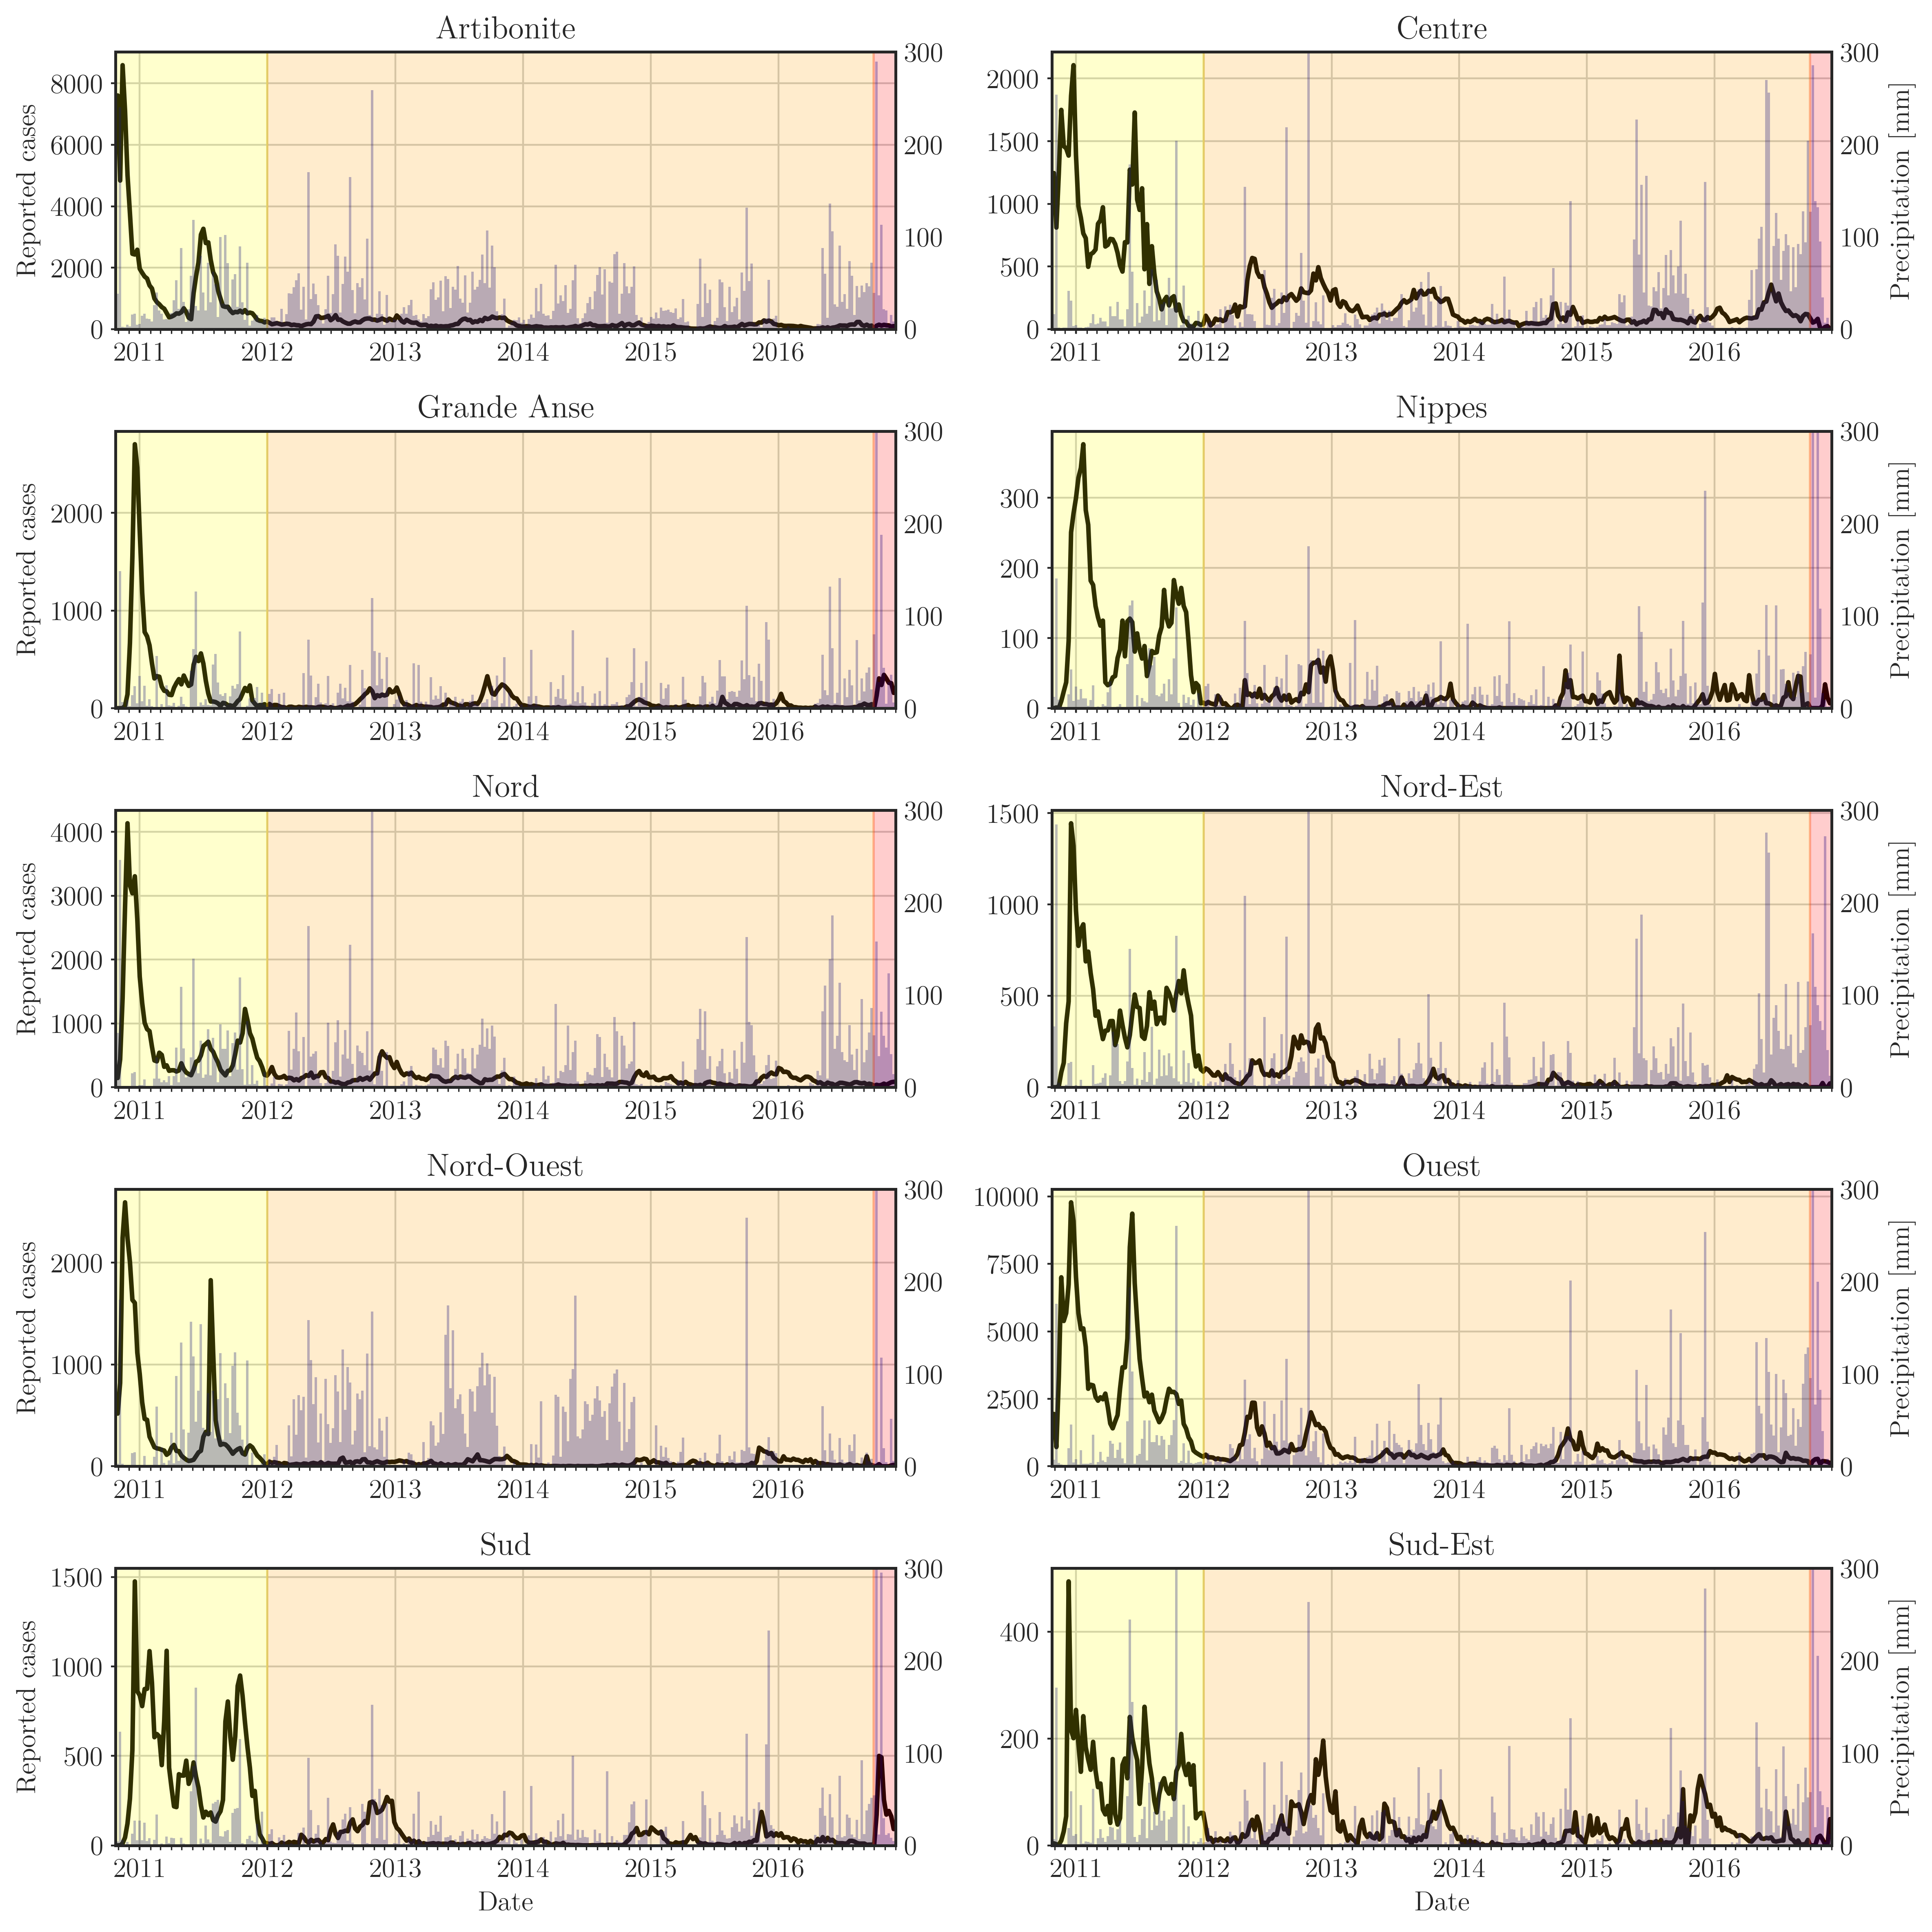

In [3]:
plt.style.use('seaborn-white')
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'font.serif':'Latin Modern Roman',
          'font.family': 'serif',
          'axes.labelweight': 'normal',
          'font.size': 22}
mpl.rcParams.update(params)
mpl.rc('font', family='serif')   
mpl.rc('font', serif='Latin Modern Roman')   
mpl.rcParams.update({'font.size': 12})     
mpl.rc('text', usetex=False)

fig, axes = plt.subplots(5, 2, figsize=(12,12), squeeze = True, dpi=400);
axes = axes.flatten()

ti = t0 #datetime.date(2014, 9, 30)
tf = t3

for i, dp in enumerate(dept_name):
    ax = axes[i]
    axt =  ax.twinx()
   
    start = mdates.date2num(t0)
    end = mdates.date2num(t1)
    width = end - start
    rect = Rectangle((start, 0), width, 300, color='yellow', alpha= 0.1)
    axt.add_patch(rect)
    axt.add_artist(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/1.5
    start = mdates.date2num(t1)
    end = mdates.date2num(t2)
    width = end - start
    rect = Rectangle((start, 0), width, 300, color='orange', alpha= 0.1)
    axt.add_patch(rect) 
    axt.add_artist(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/1.5
    start = mdates.date2num(t2)
    end = mdates.date2num(t3)
    width = end - start
    rect = Rectangle((start, 0), width, 300, color='red', alpha= 0.1)
    axt.add_patch(rect) 
    axt.add_artist(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/1.5
    
    axt.bar(rain[ti:tf].index.date, rain[ti:tf][dp], label = r'Rainfall', 
       color = 'darkblue', width=7, alpha = 0.3)
    ax.plot(cases[ti:tf].index.date, cases[ti:tf][dp], color = 'black', marker = '', linewidth = 2, linestyle='-')

    ax.set_xlim(ti,tf)
    if i > 7: ax.set_xlabel(r'Date')
    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%2 != 0: axt.set_ylabel(r'Precipitation [mm]')
    if i%2 != 1: ax.set_ylabel(r'Reported cases')
    axt.set_ylim(0,300)
    ax.set_ylim(0)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='both', which='both', length=2)
    ax.tick_params(axis='both', which='both', length=2)

fig.tight_layout()

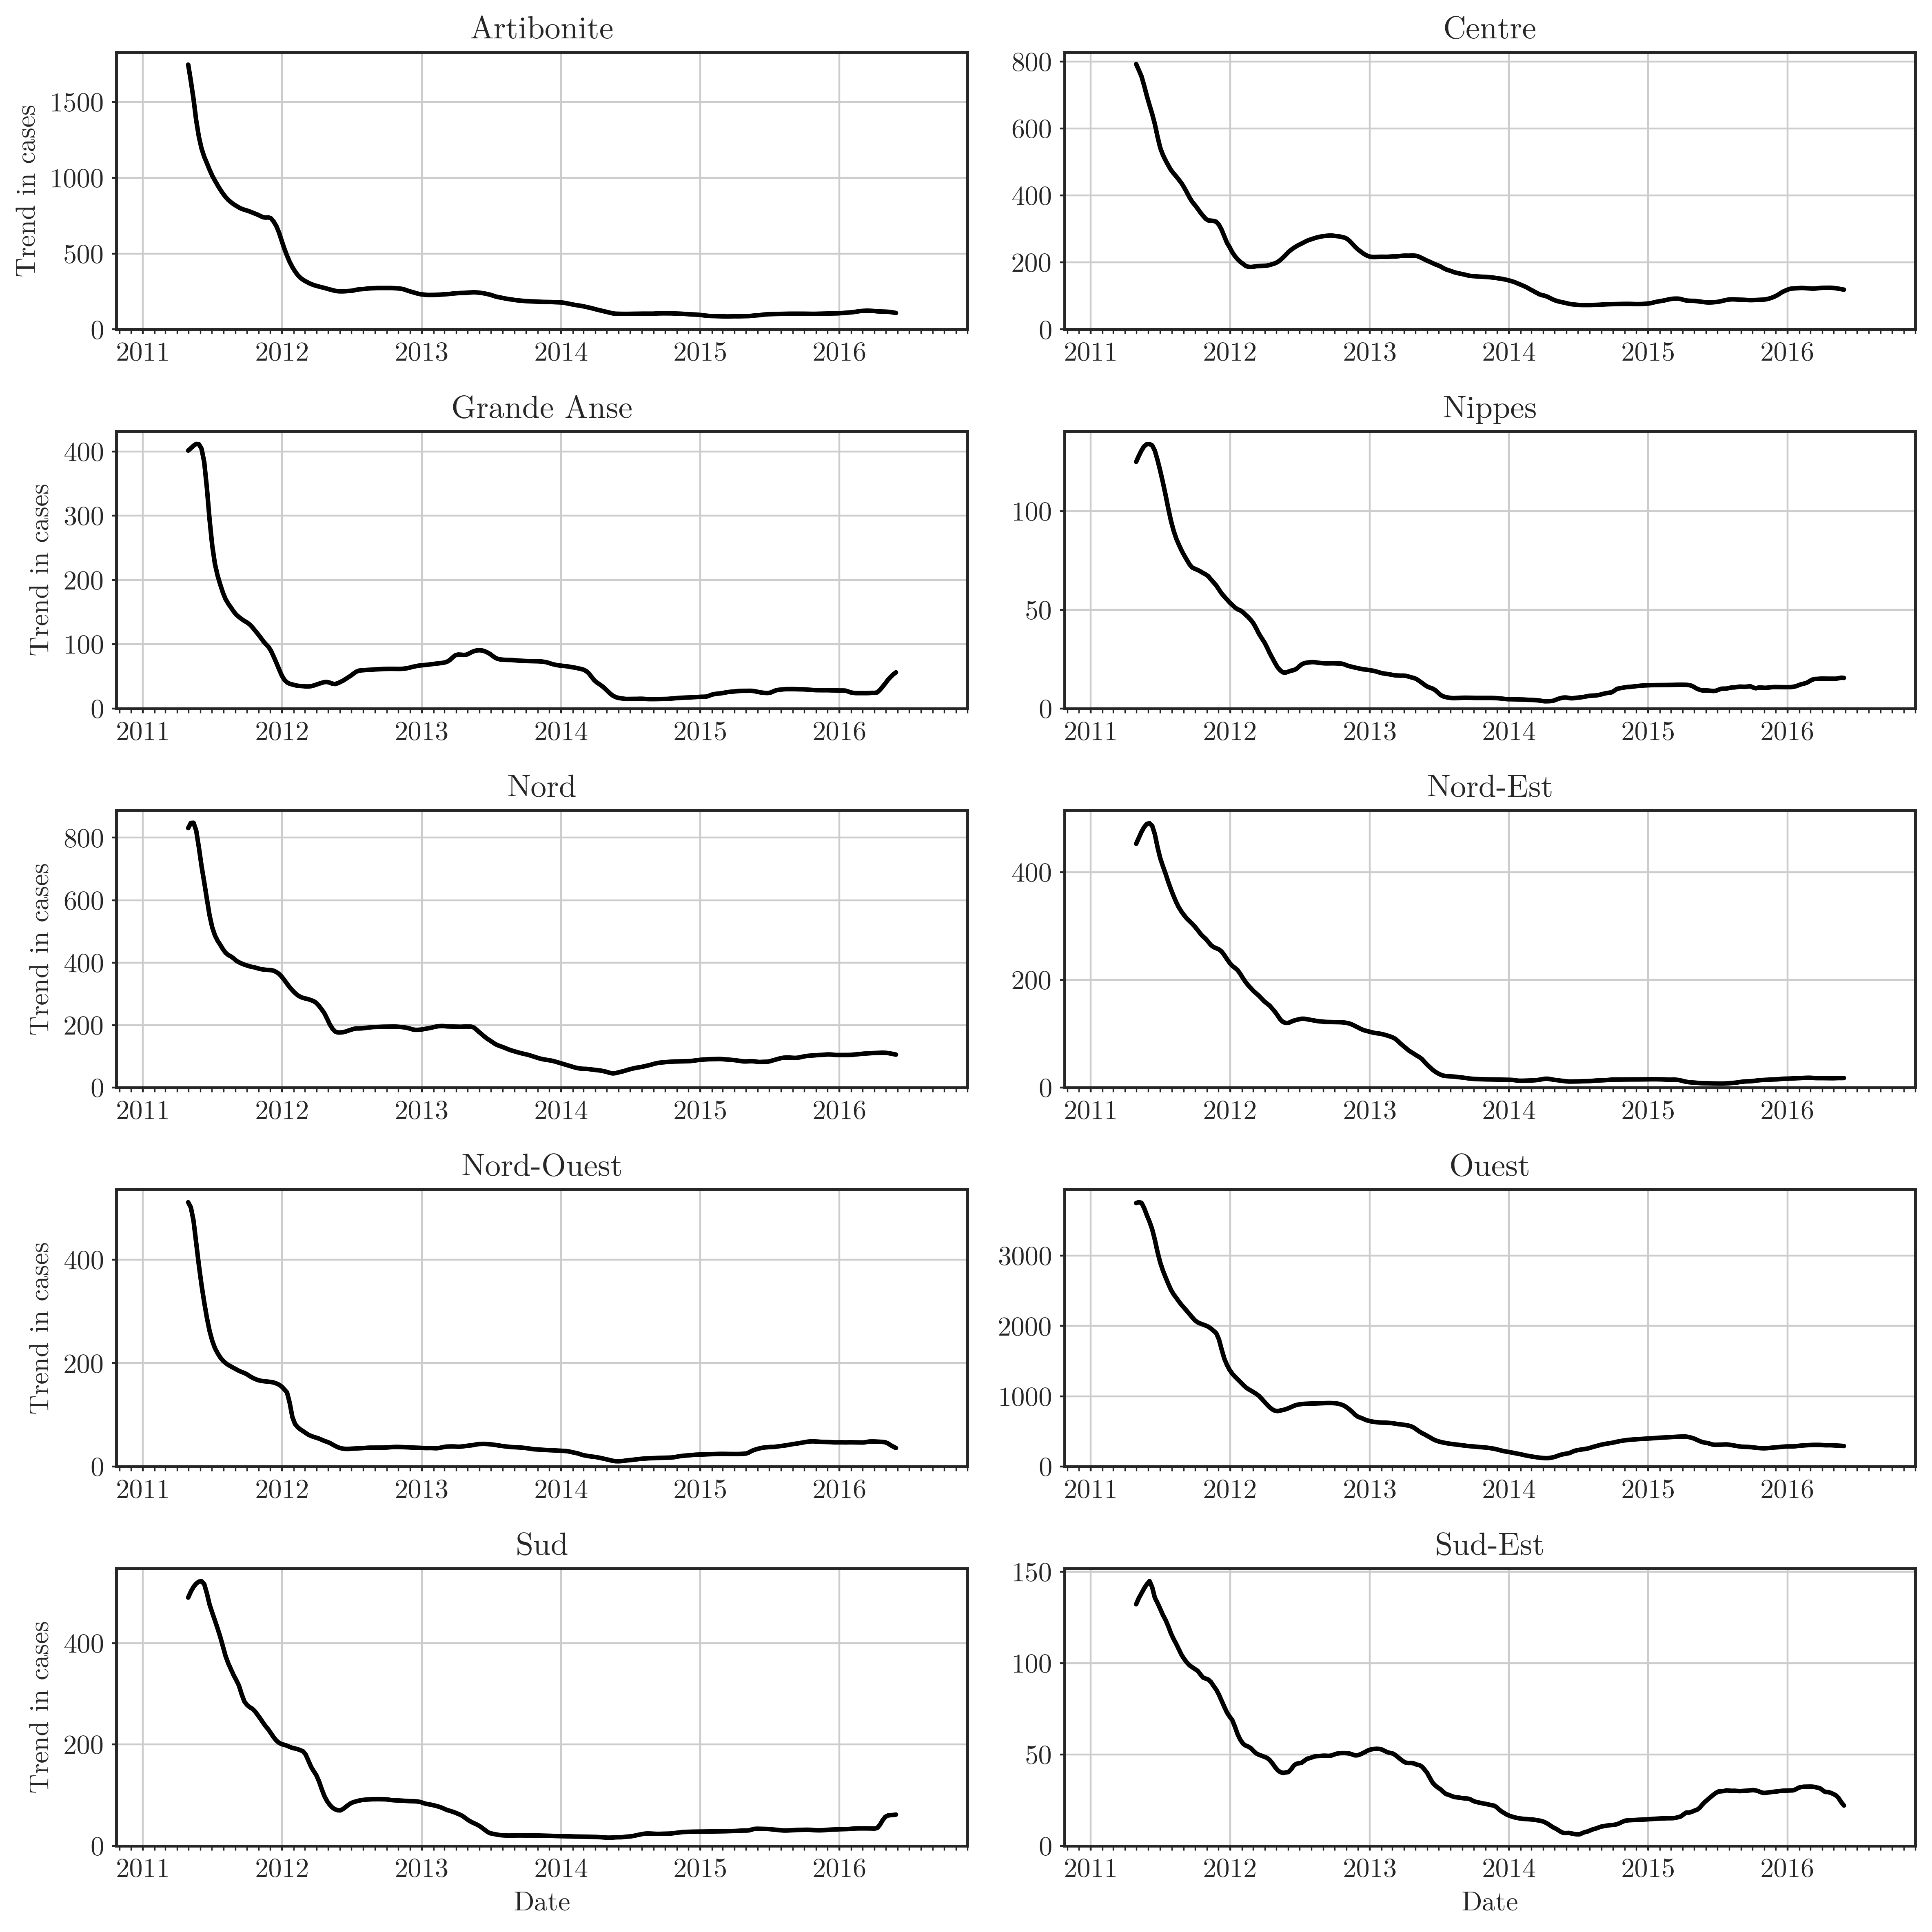

In [96]:
# http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
# https://www.otexts.org/fpp/6/3
    
fig, axes = plt.subplots(5, 2, figsize=(12,12), squeeze = True, dpi=400);
axes = axes.flatten()

ti = t0
tf = t3

for i, dp in enumerate(dept_name):
    ax = axes[i]
    
    series = cases[ti:tf][dp]
    result = seasonal_decompose(series, model='additive')
    ax.plot(result.trend.index.date, result.trend, color = 'black', marker = '', linewidth = 2, linestyle='-')
    
    ax.set_xlim(ti,tf)
    if i > 7: ax.set_xlabel(r'Date')
    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%2 != 1: ax.set_ylabel(r'Trend in cases')
    ax.set_ylim(0)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='both', which='both', length=2)
    ax.tick_params(axis='both', which='both', length=2)
    
fig.tight_layout()

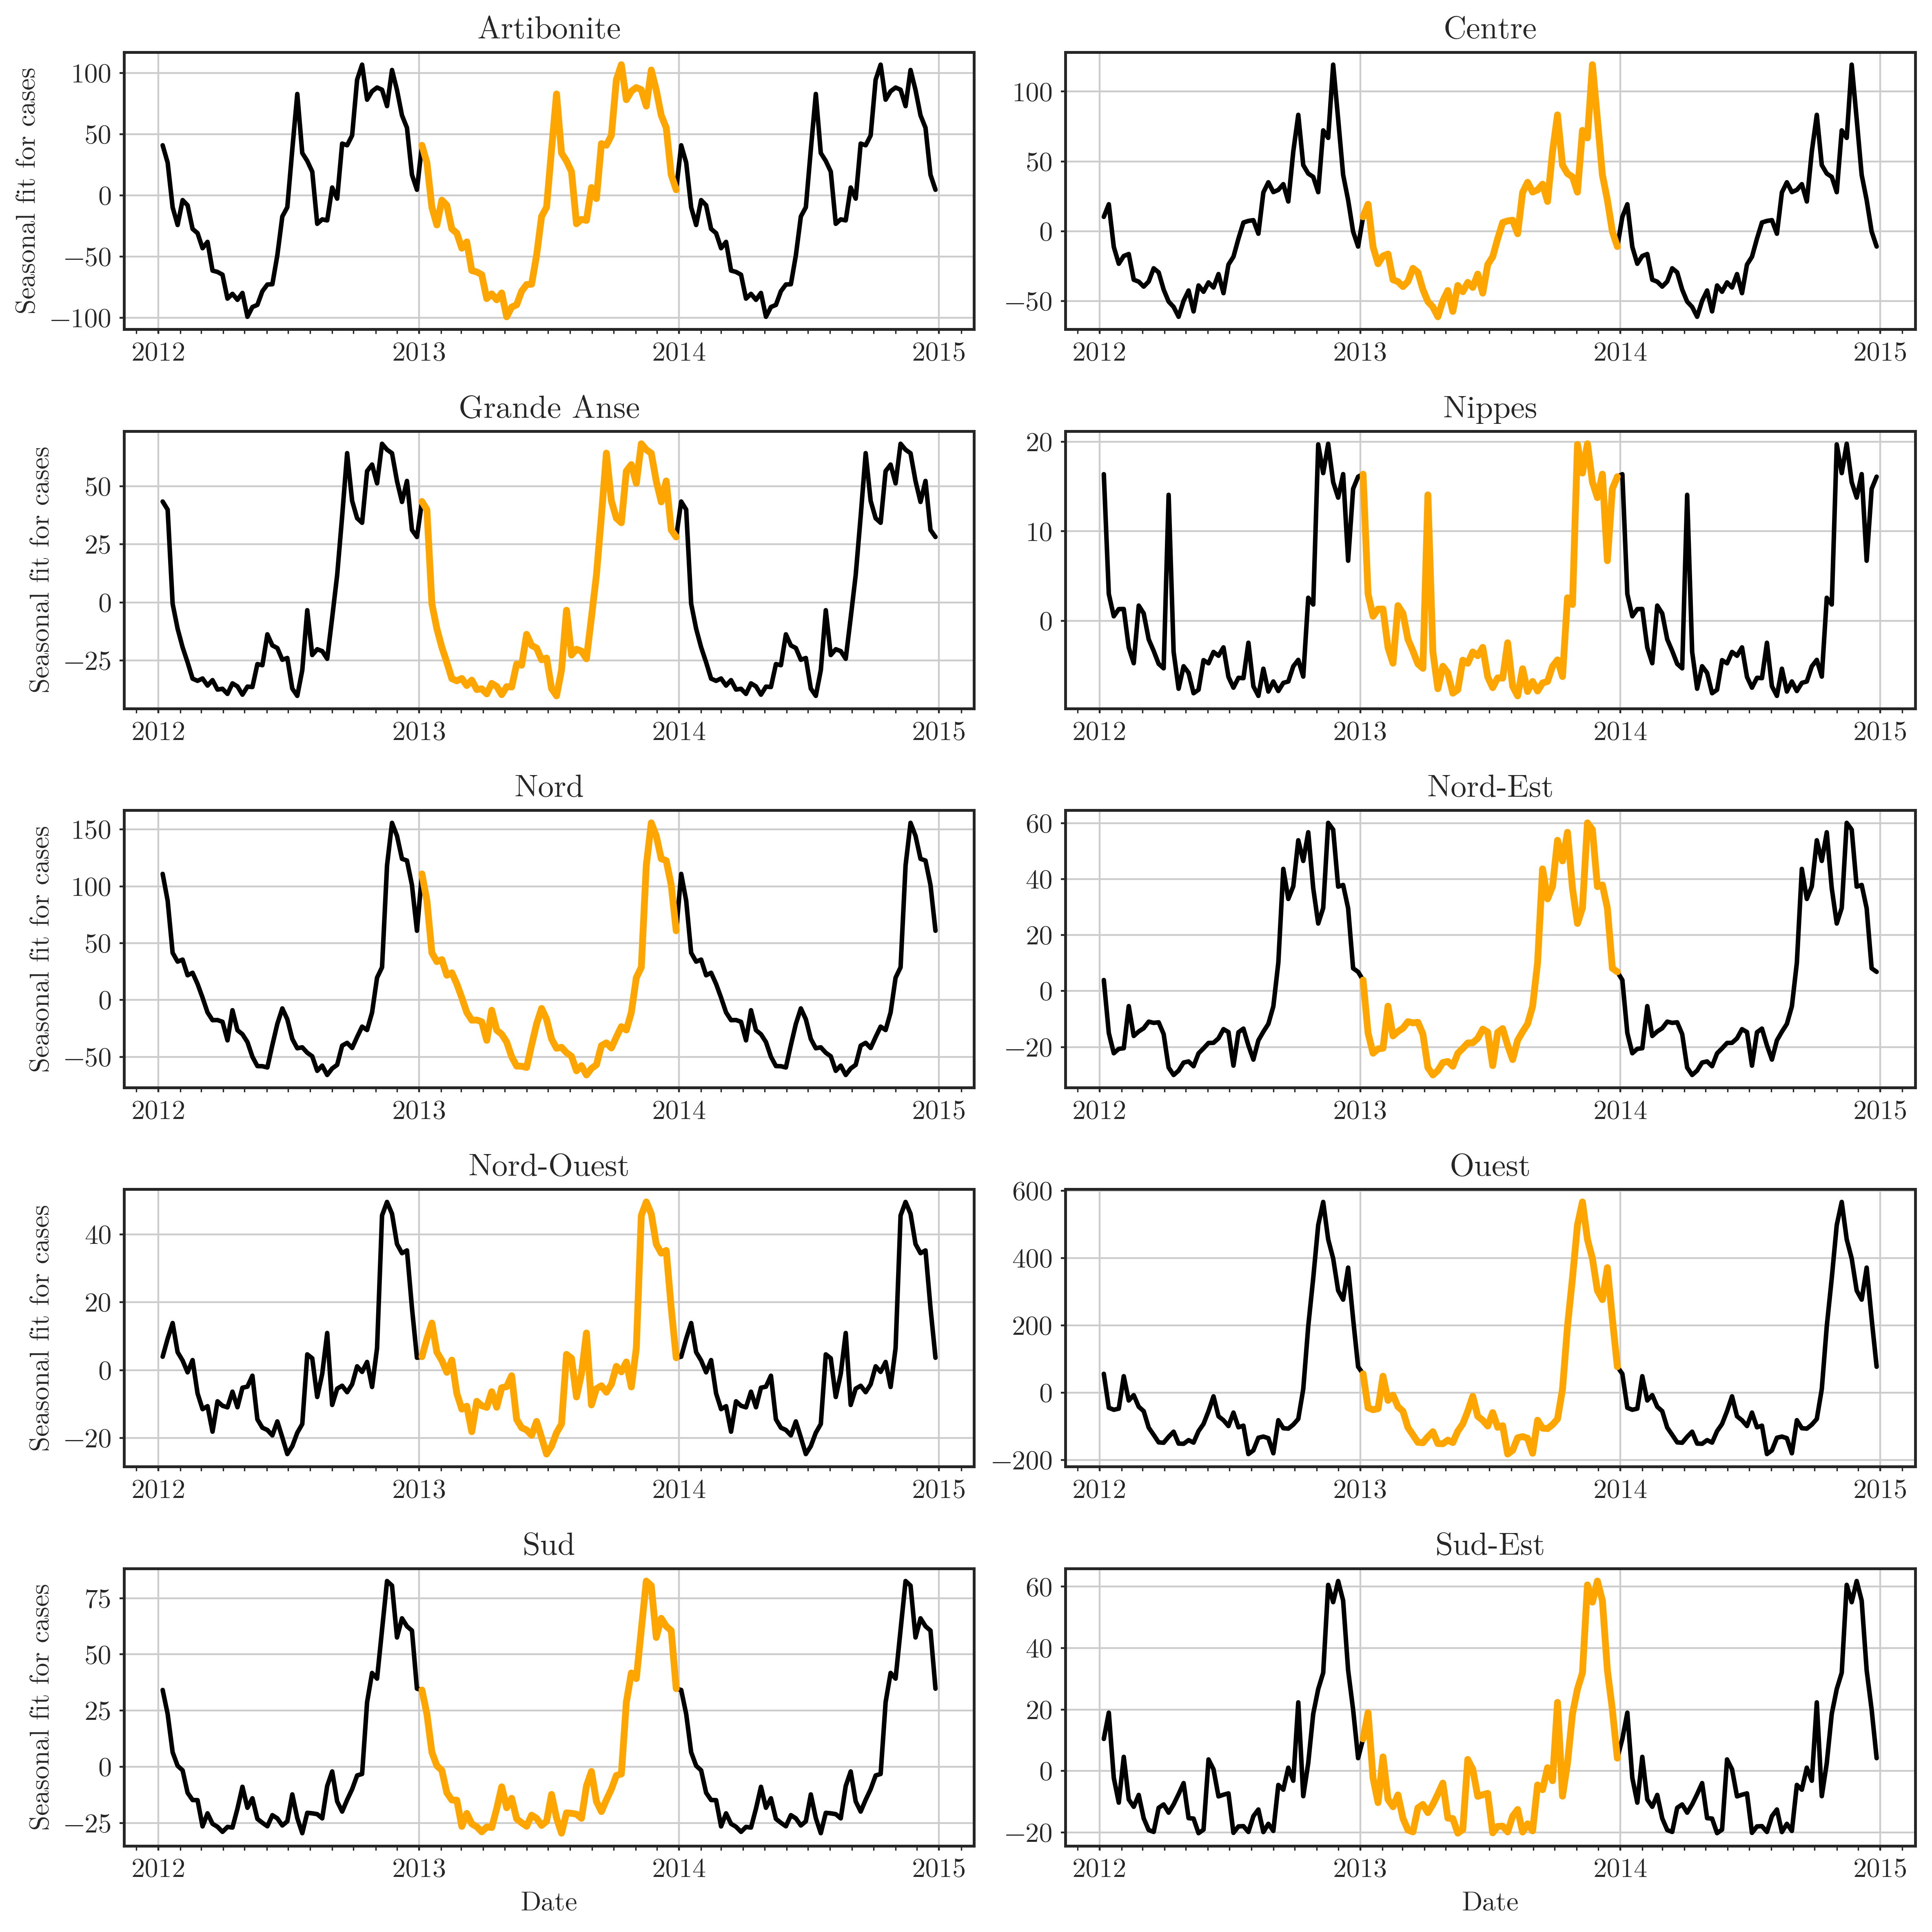

In [82]:
fig, axes = plt.subplots(5, 2, figsize=(12,12), squeeze = True, dpi=400);
axes = axes.flatten()

ti = t1
tf = t2

for i, dp in enumerate(dept_name):
    ax = axes[i]
    
    series = cases[ti:tf][dp]
    result = seasonal_decompose(series, model='additive')
    ax.plot(result.seasonal[datetime.date(2012,1,1):datetime.date(2015,1,1)].index.date, 
            result.seasonal[datetime.date(2012,1,1):datetime.date(2015,1,1)],
            color = 'black', marker = '', linewidth = 2, linestyle='-')
    ax.plot(result.seasonal[datetime.date(2013,1,1):datetime.date(2014,1,1)].index.date, 
            result.seasonal[datetime.date(2013,1,1):datetime.date(2014,1,1)],
            color = 'orange', marker = '', linewidth = 3, linestyle='-')
    
    #ax.set_xlim(ti,tf)
    if i > 7: ax.set_xlabel(r'Date')
    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%2 != 1: ax.set_ylabel(r'Seasonal fit for cases')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='both', which='both', length=2)
    ax.tick_params(axis='both', which='both', length=2)
    
fig.tight_layout()

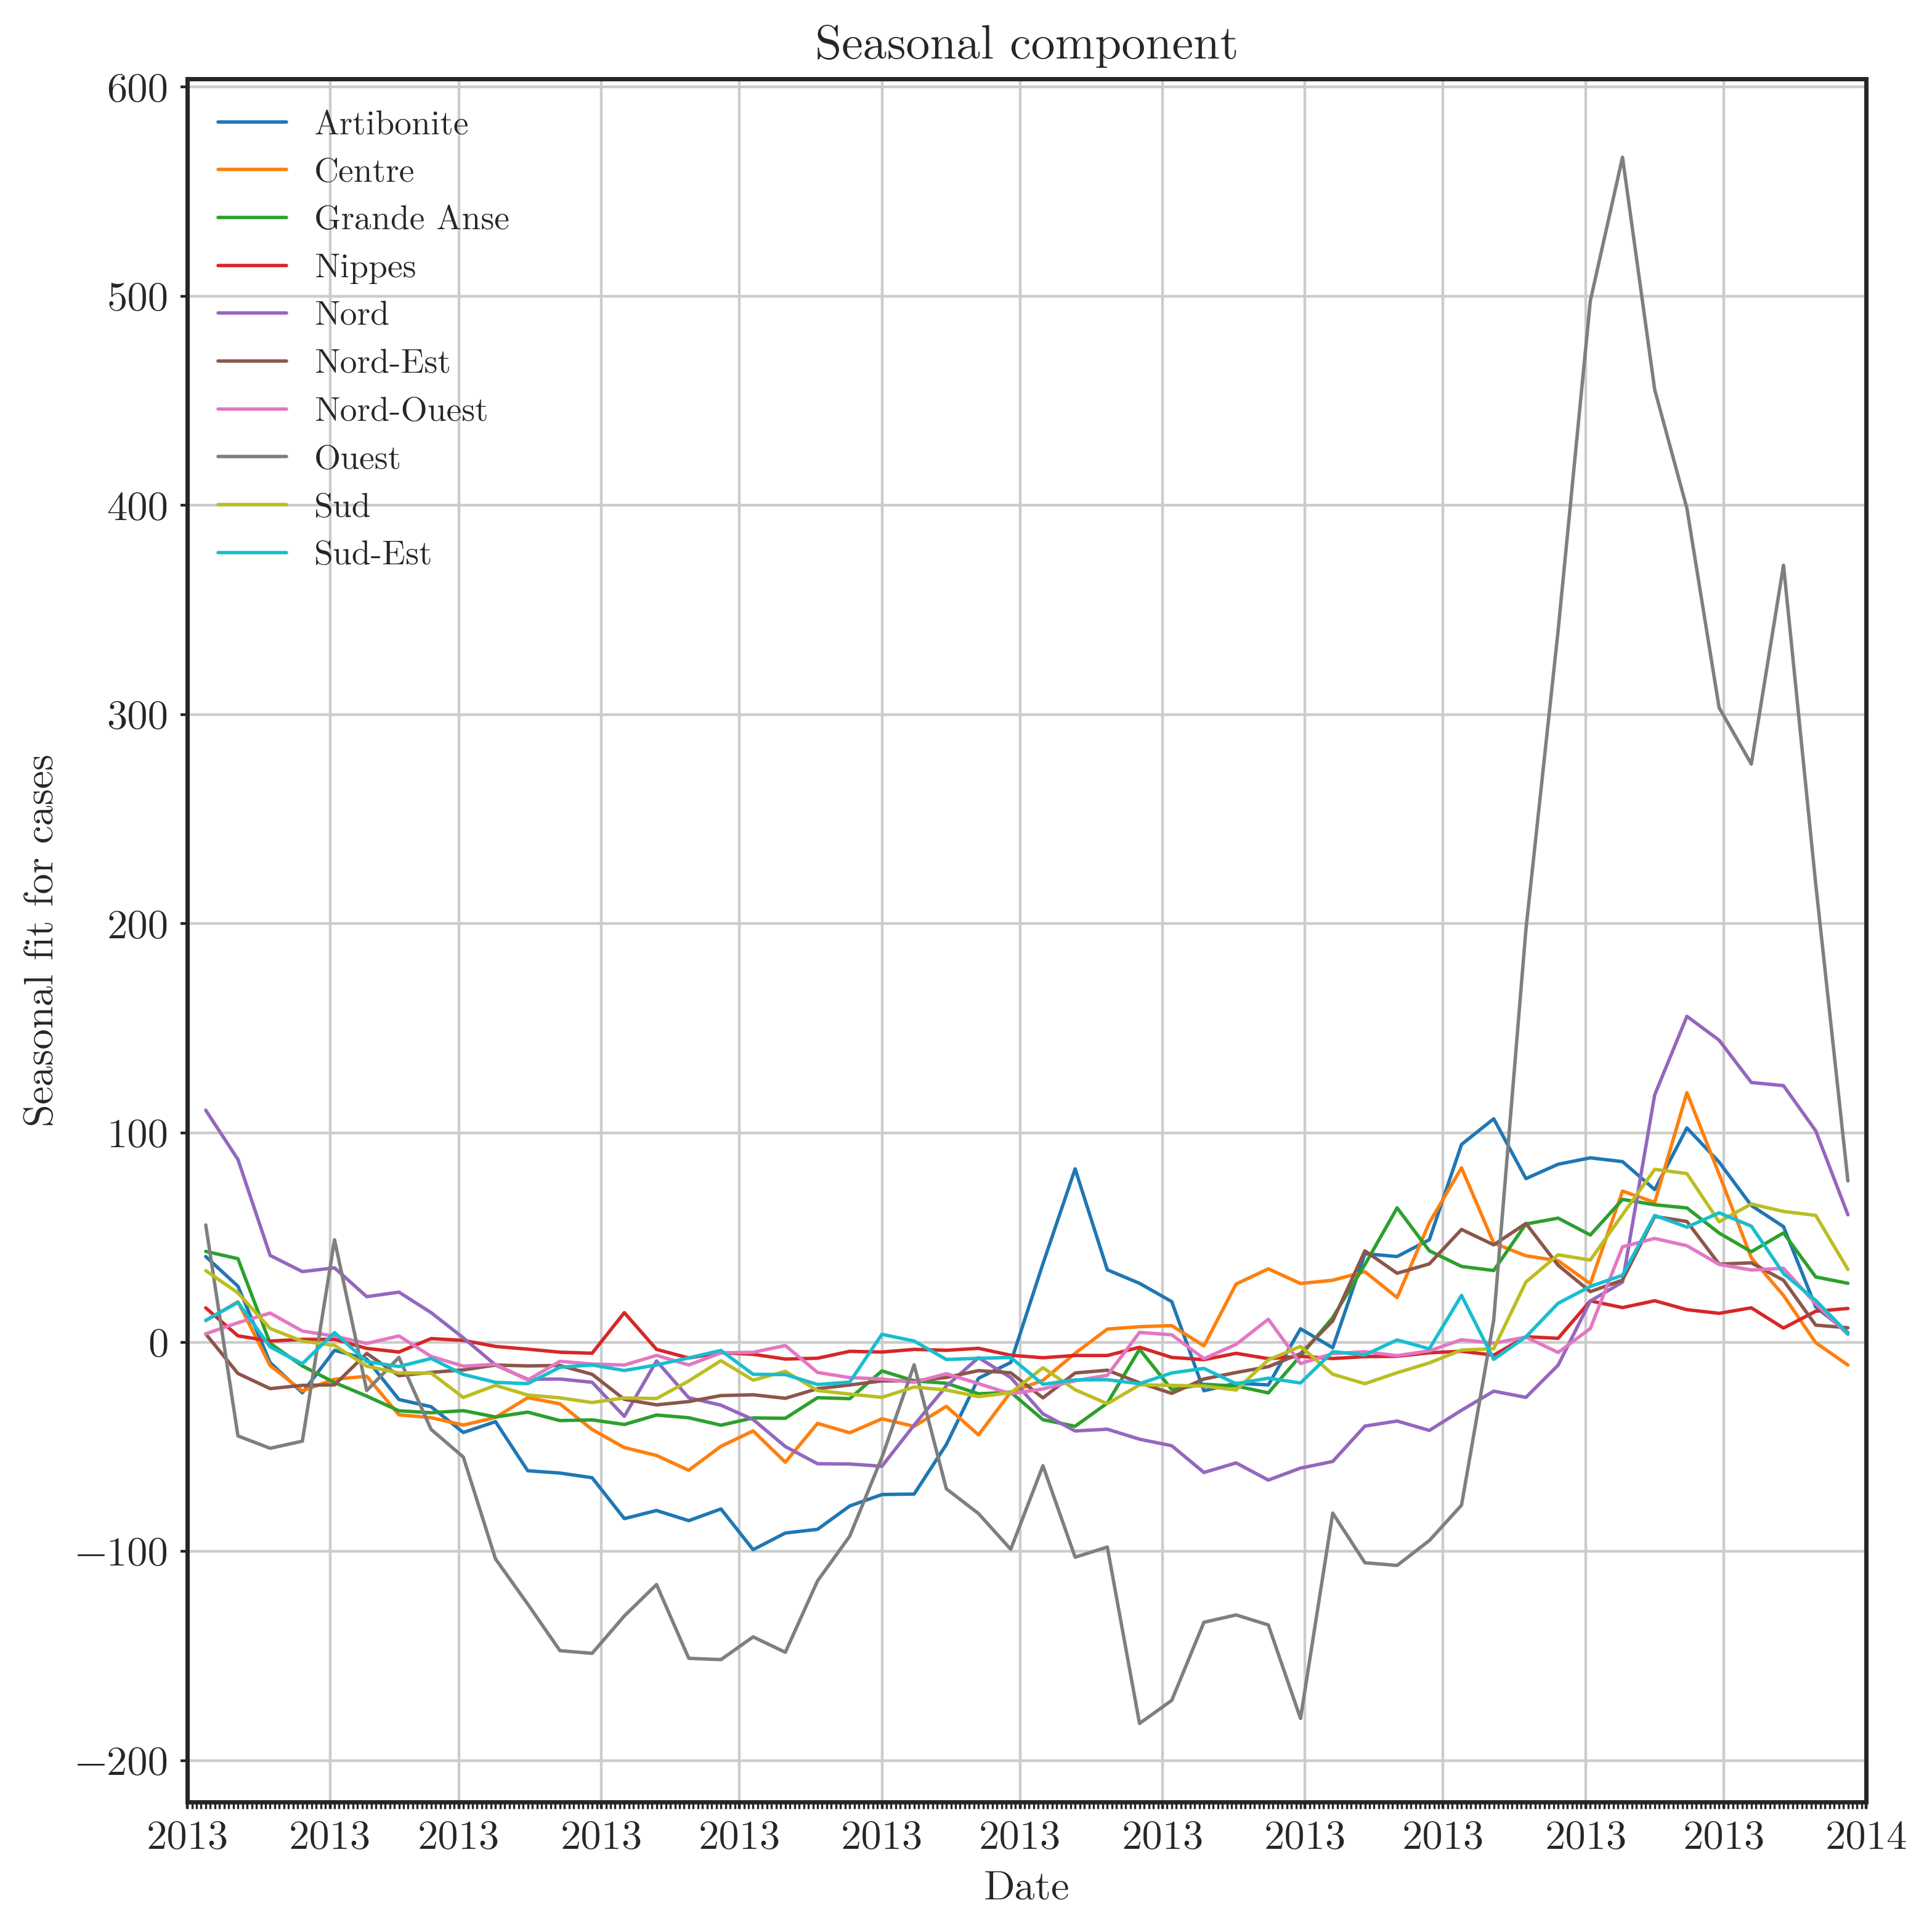

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), squeeze = True, dpi=400);

ti = t1
tf = t2

for i, dp in enumerate(dept_name):
    series = cases[ti:tf][dp]
    result = seasonal_decompose(series, model='additive')
    ax.plot(result.seasonal[datetime.date(2013,1,1):datetime.date(2014,1,1)].index.date, 
            result.seasonal[datetime.date(2013,1,1):datetime.date(2014,1,1)],
            label = dp, marker = '', linewidth = 1, linestyle='-')
    
ax.set_xlabel(r'Date')
ax.grid()
ax.set_title('Seasonal component', fontsize=14)
ax.set_ylabel(r'Seasonal fit for cases')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.tick_params(axis='both', which='both', length=2)
ax.tick_params(axis='both', which='both', length=2)
ax.legend(fontsize = 10)
ax.set_xlim(datetime.date(2013,1,1),datetime.date(2014,1,1))
fig.tight_layout()

In [6]:
#As regards the rains, there is usually a dry season from December to February, and a 
#rainy season from April to October, with with two peaks at the beginning and the 
#end of the period, and a relative pause in July. Coralated.

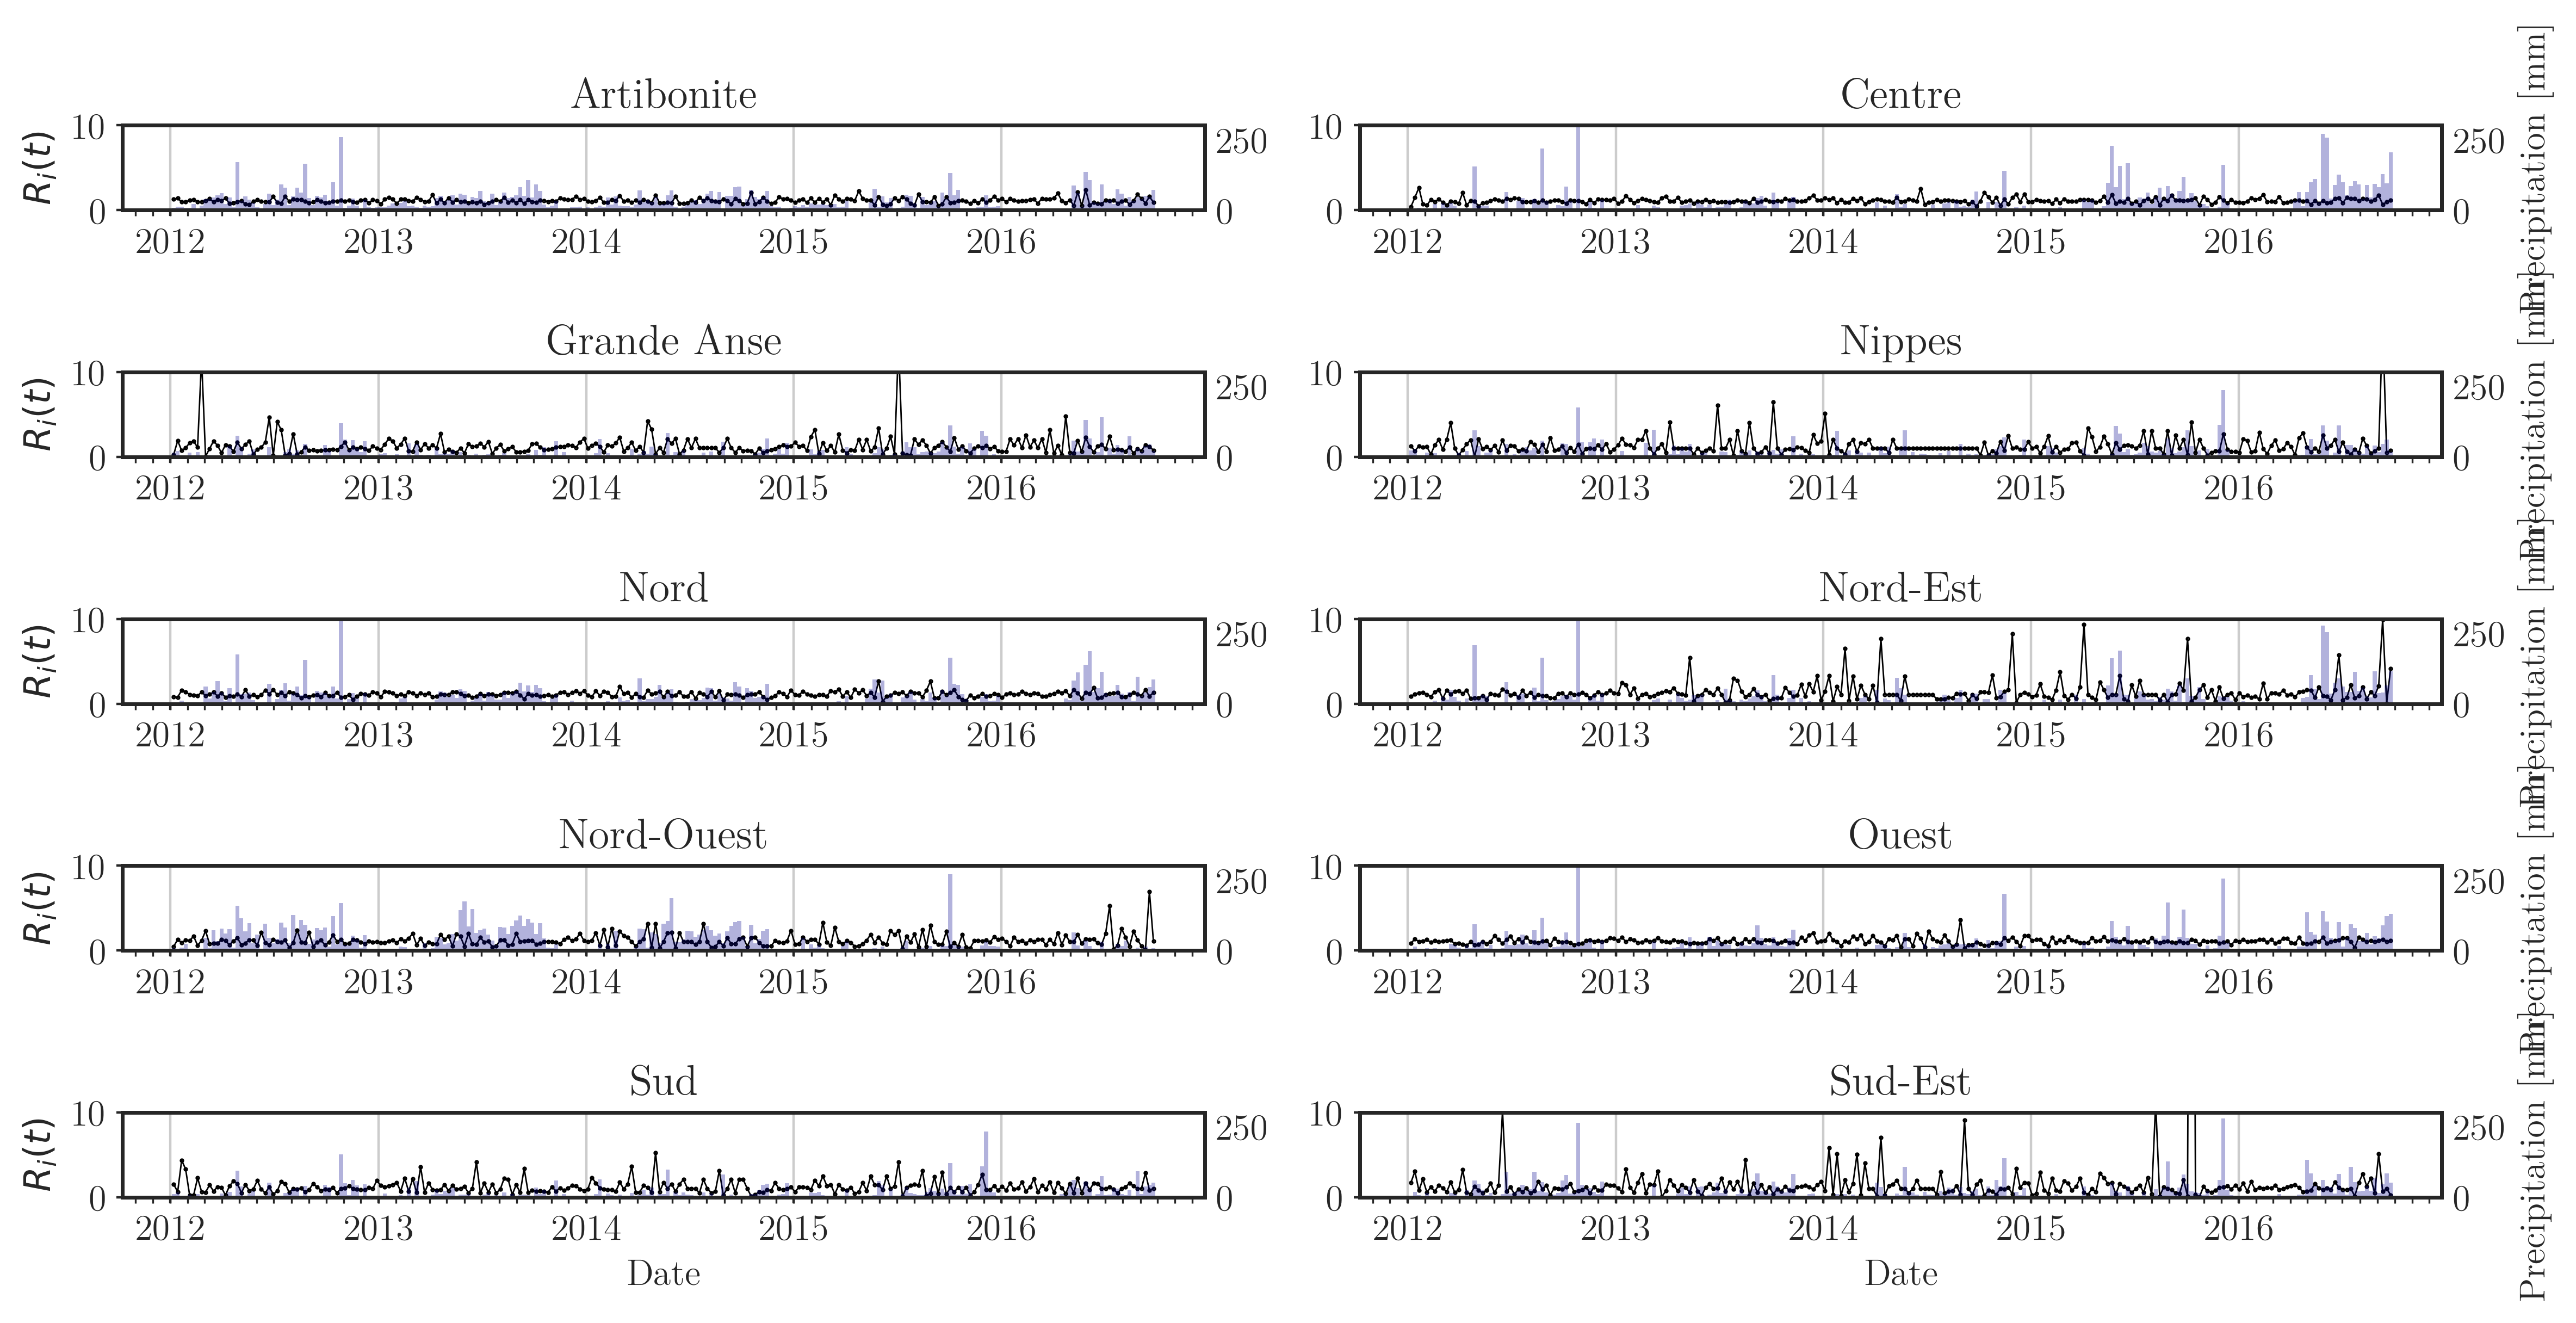

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(12,6), squeeze = True, dpi=400);
axes = axes.flatten()

ti = t1
tf = t2

for i, dp in enumerate(dept_name):
    ax = axes[i]
    axt =  ax.twinx()
    ax.plot(brn[ti:tf].index.date, brn[ti:tf][dp],color = 'black', marker = '.', linewidth = .5, linestyle='-', markersize=1)
    if i > 7: 
        ax.set_xlabel(r'Date')

    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%2 != 1: ax.set_ylabel(r'$R_i(t)$')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='both', which='both', length=2)
    ax.tick_params(axis='both', which='both', length=2)
    #ax.set_ylim(0,max_irn)
    ax.set_ylim(0,10)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    axt.bar(rain[ti:tf].index.date, rain[ti:tf][dp], label = r'Rainfall',  color = 'darkblue', width=7, alpha = 0.3)
    if i%2 != 0: axt.set_ylabel(r'Precipitation [mm]')
    axt.set_ylim(0,300)

    
fig.tight_layout()

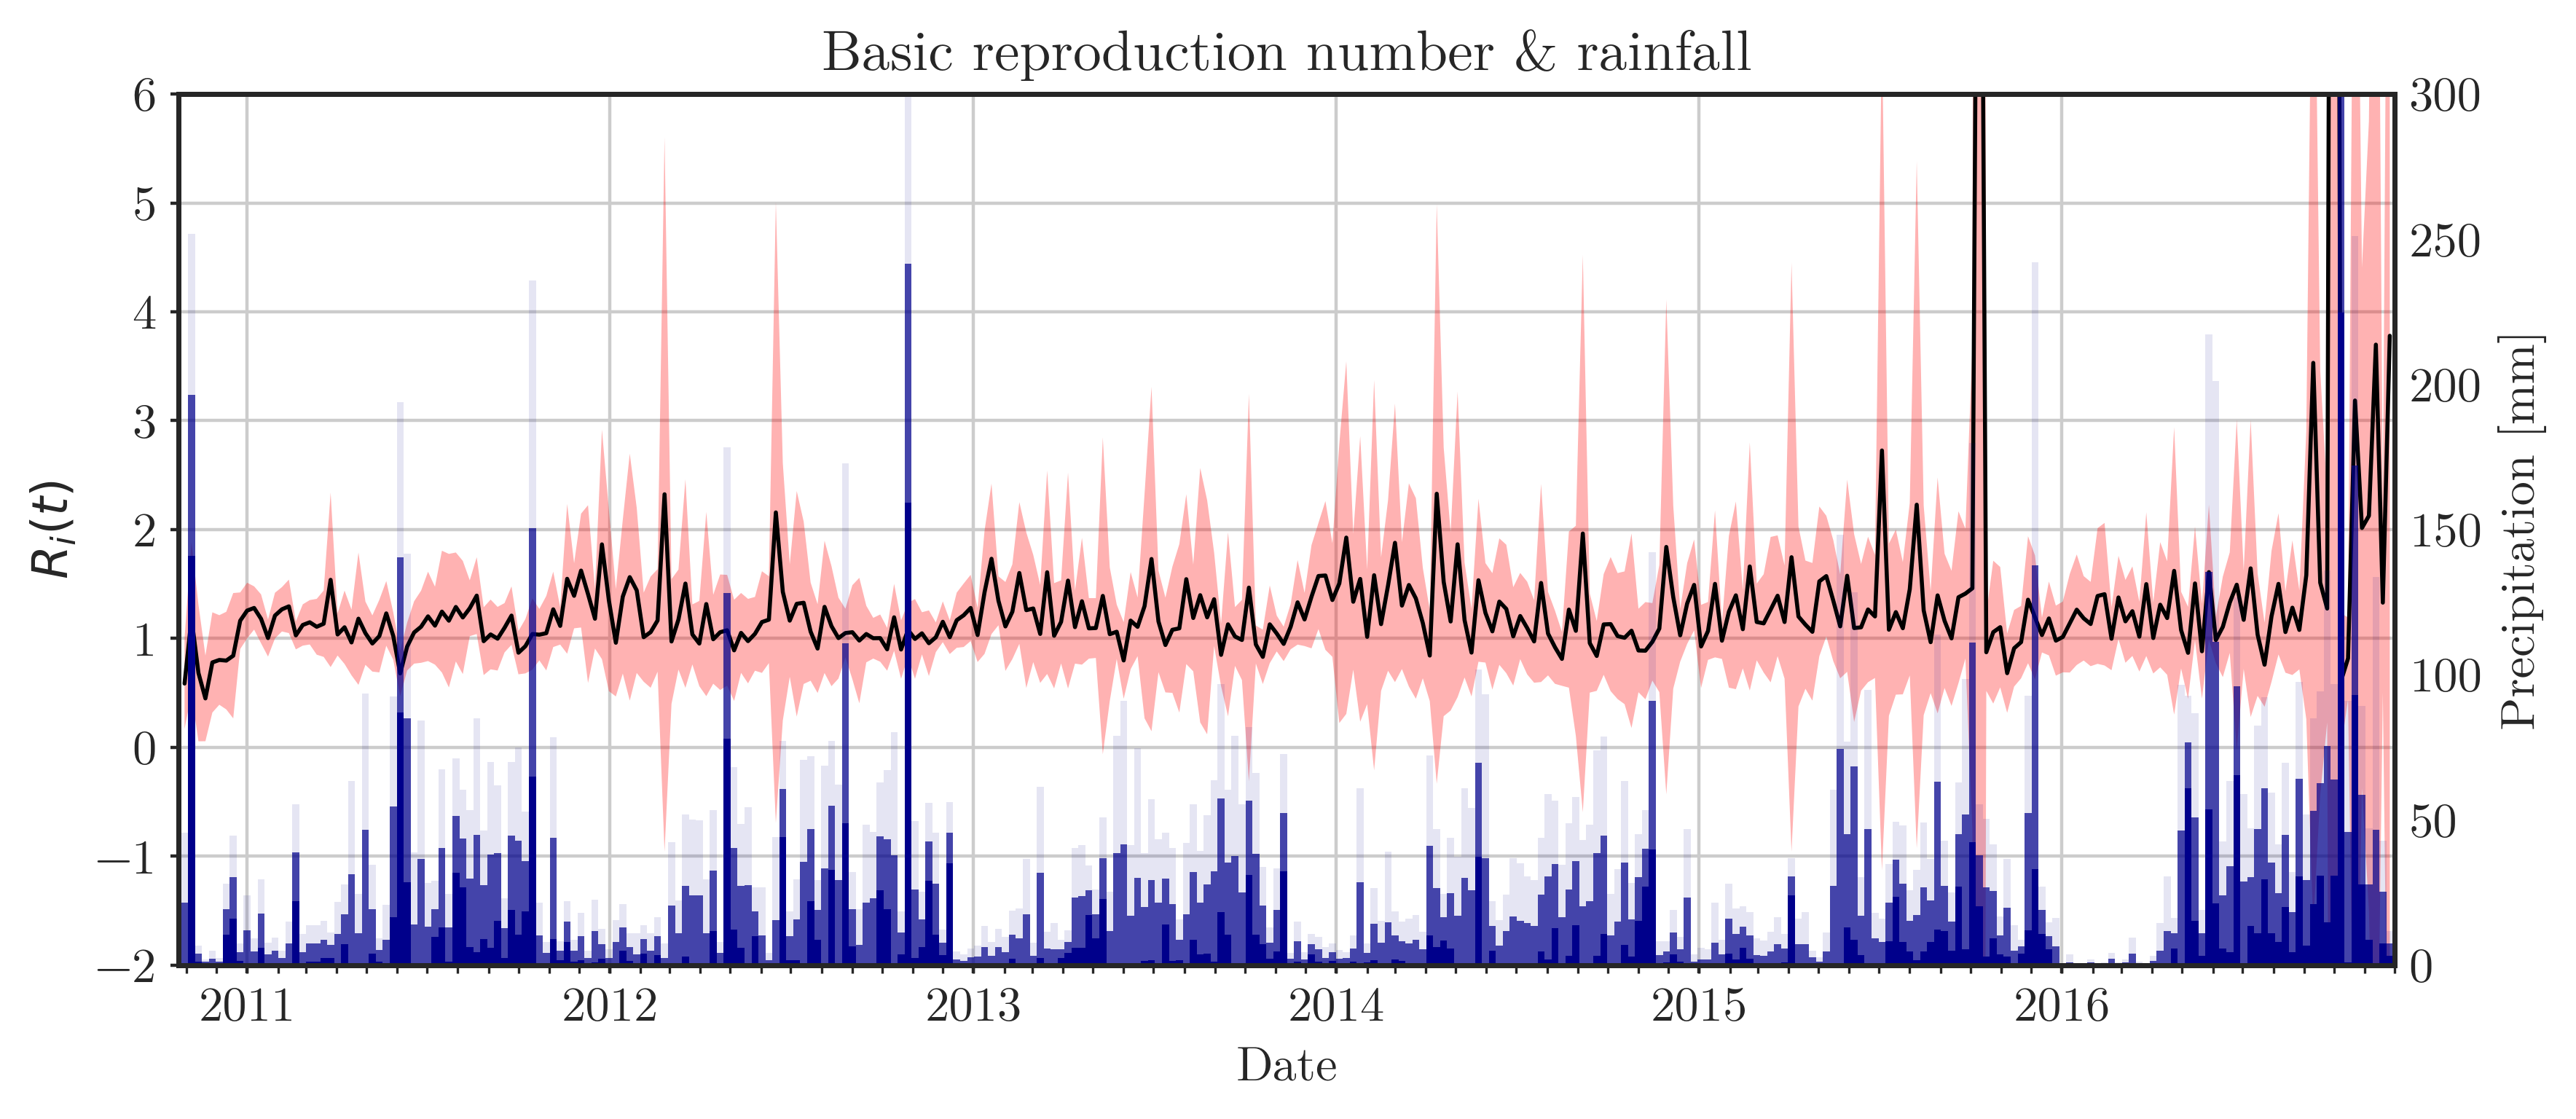

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9,4), squeeze = True, dpi=400);

ti = t0
tf = t3

axt =  ax.twinx()

brn_mean = brn.mean(axis=1)[ti:tf]
brn_std = brn.std(axis = 1)[ti:tf]

rain_mean = rain.mean(axis=1)[ti:tf]
rain_std = rain.std(axis = 1)[ti:tf]
axt.bar(rain_mean[ti:tf].index.date, rain_mean[ti:tf]+rain_std, label = r'Rainfall',  color = 'darkblue', width=7, alpha = 0.1)
axt.bar(rain_mean[ti:tf].index.date, rain_mean[ti:tf], label = r'Rainfall',  color = 'darkblue', width=7, alpha = 0.7)
axt.bar(rain_mean[ti:tf].index.date, rain_mean[ti:tf]-rain_std, label = r'Rainfall',  color = 'darkblue', width=7, alpha = 1)


ax.plot(brn_mean.index.date, brn_mean, color = 'black', marker = '', linewidth = 1, linestyle='-', markersize=1)
ax.fill_between(brn_mean.index.date, brn_mean + brn_std, brn_mean - brn_std, facecolor='r', alpha=0.3)
#ax.plot(brn_mean.index.date, brn_mean.values - brn_std.values)
#ax.plot(brn_mean.index.date, brn_mean.values + brn_std.values)
ax.set_xlabel(r'Date')
ax.grid()
ax.set_title('Basic reproduction number & rainfall', fontsize=14)
ax.set_ylabel(r'$R_i(t)$')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='both', which='both', length=2)
ax.tick_params(axis='both', which='both', length=2)
#ax.set_ylim(0,max_irn)
ax.set_ylim(-2,6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())



axt.set_ylabel(r'Precipitation [mm]')
axt.set_ylim(0,300)
ax.set_xlim(ti, tf)

    
fig.tight_layout()

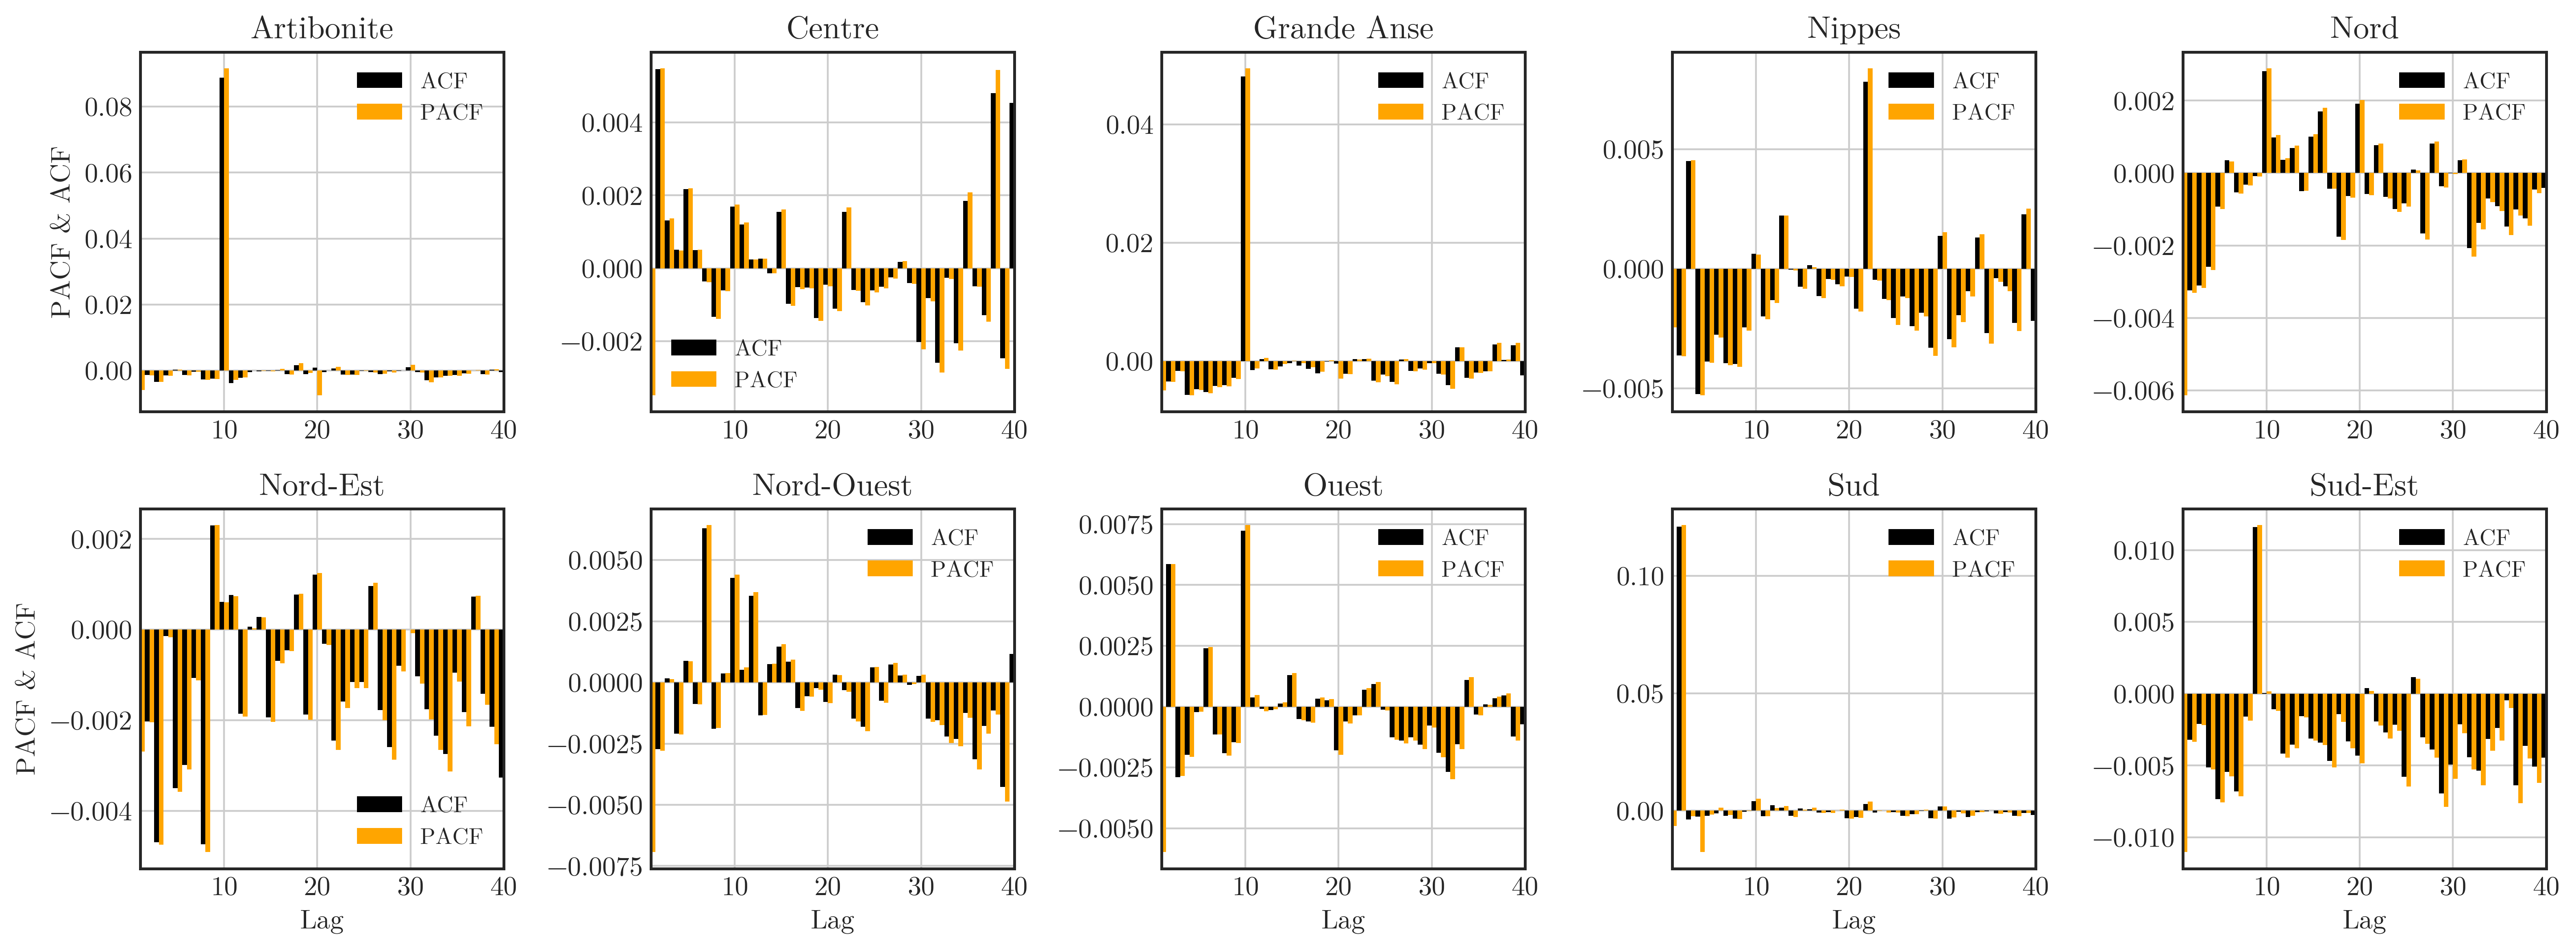

In [6]:
# Autocorrelation stuff: http://www.win.tue.nl/~aserebre/2IS55/2011-2012/2IS55%20Time%20Series%20with%20R%202011_2012.pdf
# https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf
# plt acf function exist: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf

fig, axes = plt.subplots(2, 5, figsize=(16,6), squeeze = True, dpi=400);
axes = axes.flatten()

irn = irn.fillna(value=2*max_irn)

ti = t1
tf = t2

for i, dp in enumerate(dept_name):
    ax = axes[i]
    if i > 4: 
        ax.set_xlabel(r'Lag')

    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%5 == 0: ax.set_ylabel(r'PACF & ACF')

    ticker_data_acf_1 = np.array([acf(irn[dp])[1:400],pacf(irn[dp])[1:400]]).T  # Other fnct from pandas 
    test_df = pd.DataFrame(ticker_data_acf_1)
    test_df.columns = ['ACF', 'PACF']
    test_df.index += 1
    ax.bar(test_df.index-0.25, test_df['ACF'].values, label='ACF',width=0.5, color = 'black')
    ax.bar(test_df.index+0.25, test_df['PACF'].values, label='PACF',width=0.5, color = 'orange')
    #ax.bar(test_df['ACF'], label='PACF')
    ax.set_xlim(1,40)
    ax.legend()
    

fig.tight_layout()

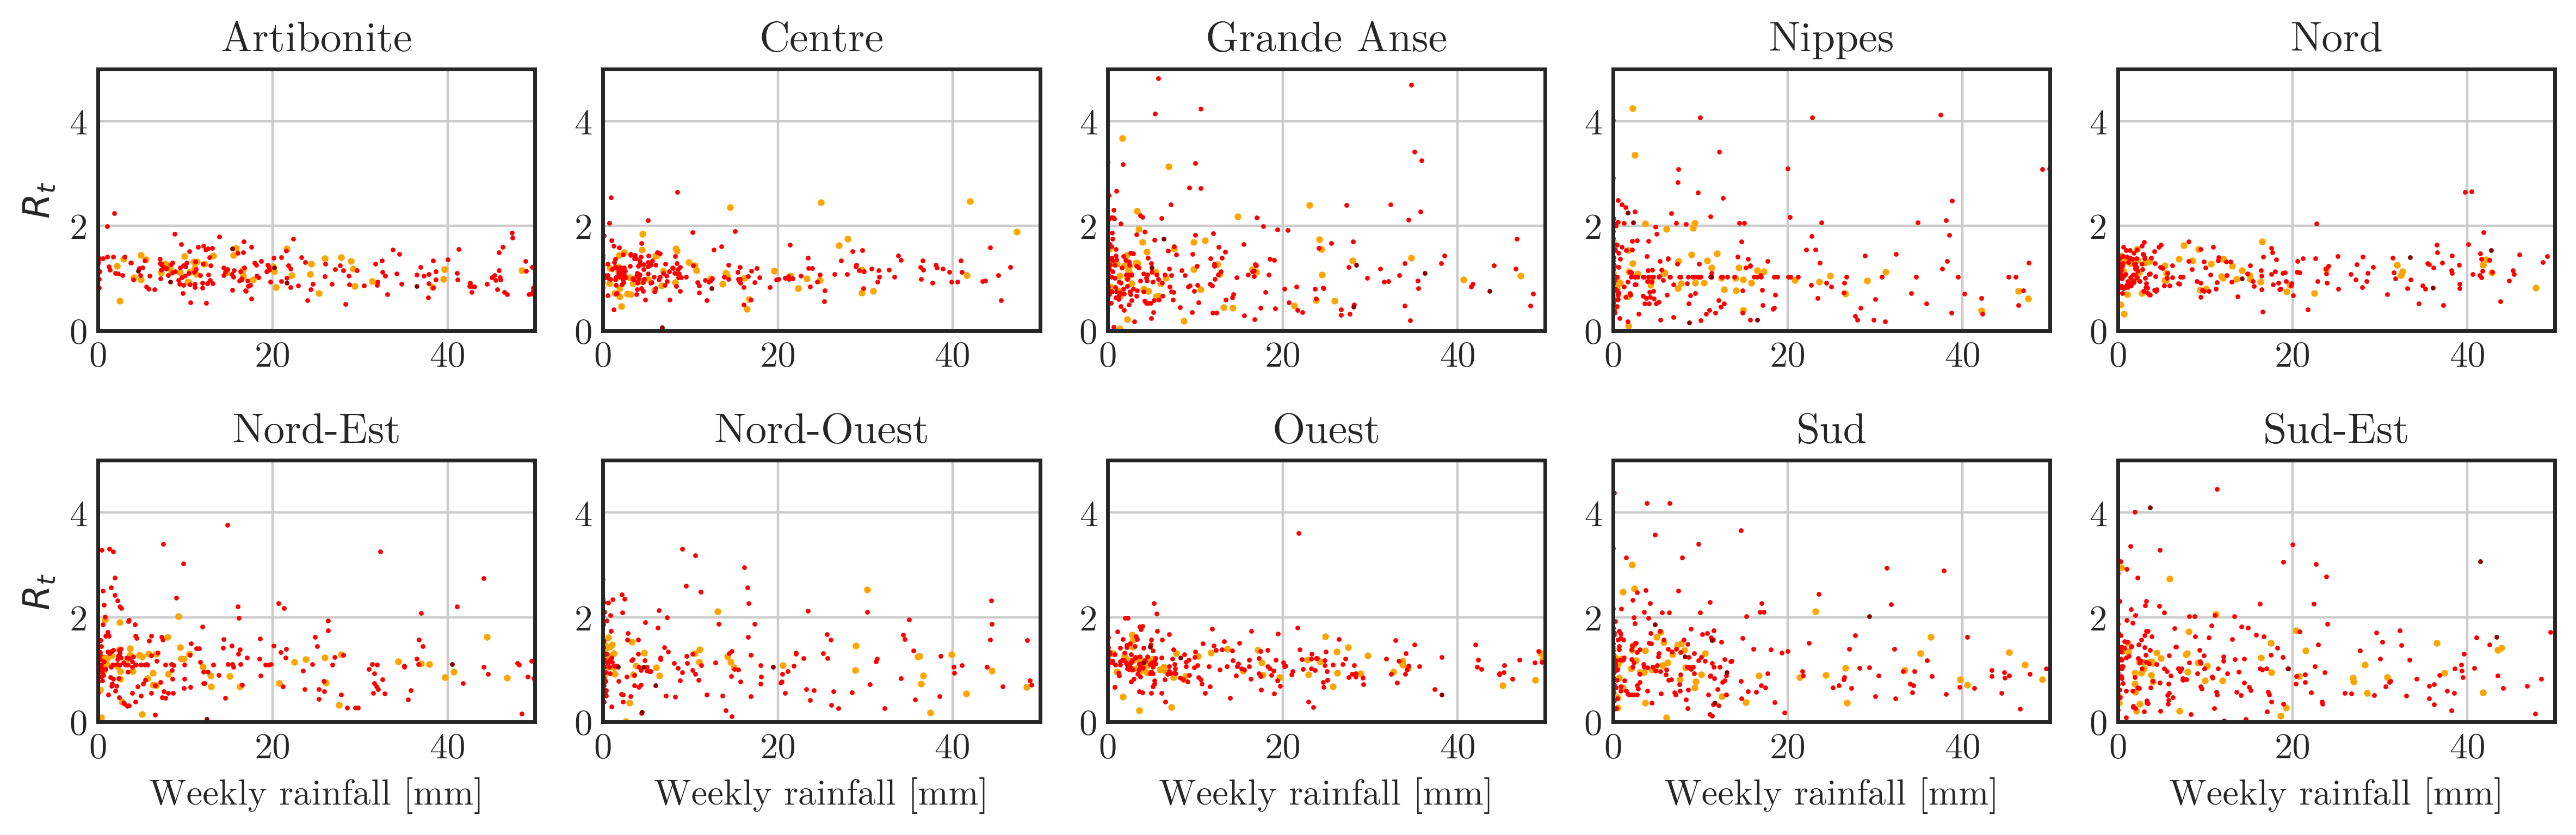

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(12,4), squeeze = True, dpi=400);
axes = axes.flatten()

for i, dp in enumerate(dept_name):
    ax = axes[i]
    if i > 4: 
        ax.set_xlabel(r'Weekly rainfall [mm]')

    ax.grid()
    ax.set_title(dp, fontsize=14)
    if i%5 == 0: ax.set_ylabel(r'$R_t$')

    ax.scatter(rain[t0:t1][dp].values, brn[t0:t1][dp].values, label = r'report', color = 'orange', marker = '.', linewidth = .01, s= 20)
    ax.scatter(rain[t1:t2][dp].values, brn[t1:t2][dp].values, label = r'report', color = 'red', marker = '.', linewidth = .01, s=10)
    ax.scatter(rain[t2:t3][dp].values, brn[t2:t3][dp].values, label = r'report', color = 'darkred', marker = '.', linewidth = .01, s=10)

    #ax.set_ylabel(r'Basic Reproduction Number')
    #ax.set_xlabel(r'Weekly rainfall [mm]')

    ax.set_xlim(0,50)
    ax.set_ylim(0,5)
# TODO plus lagged
fig.tight_layout()

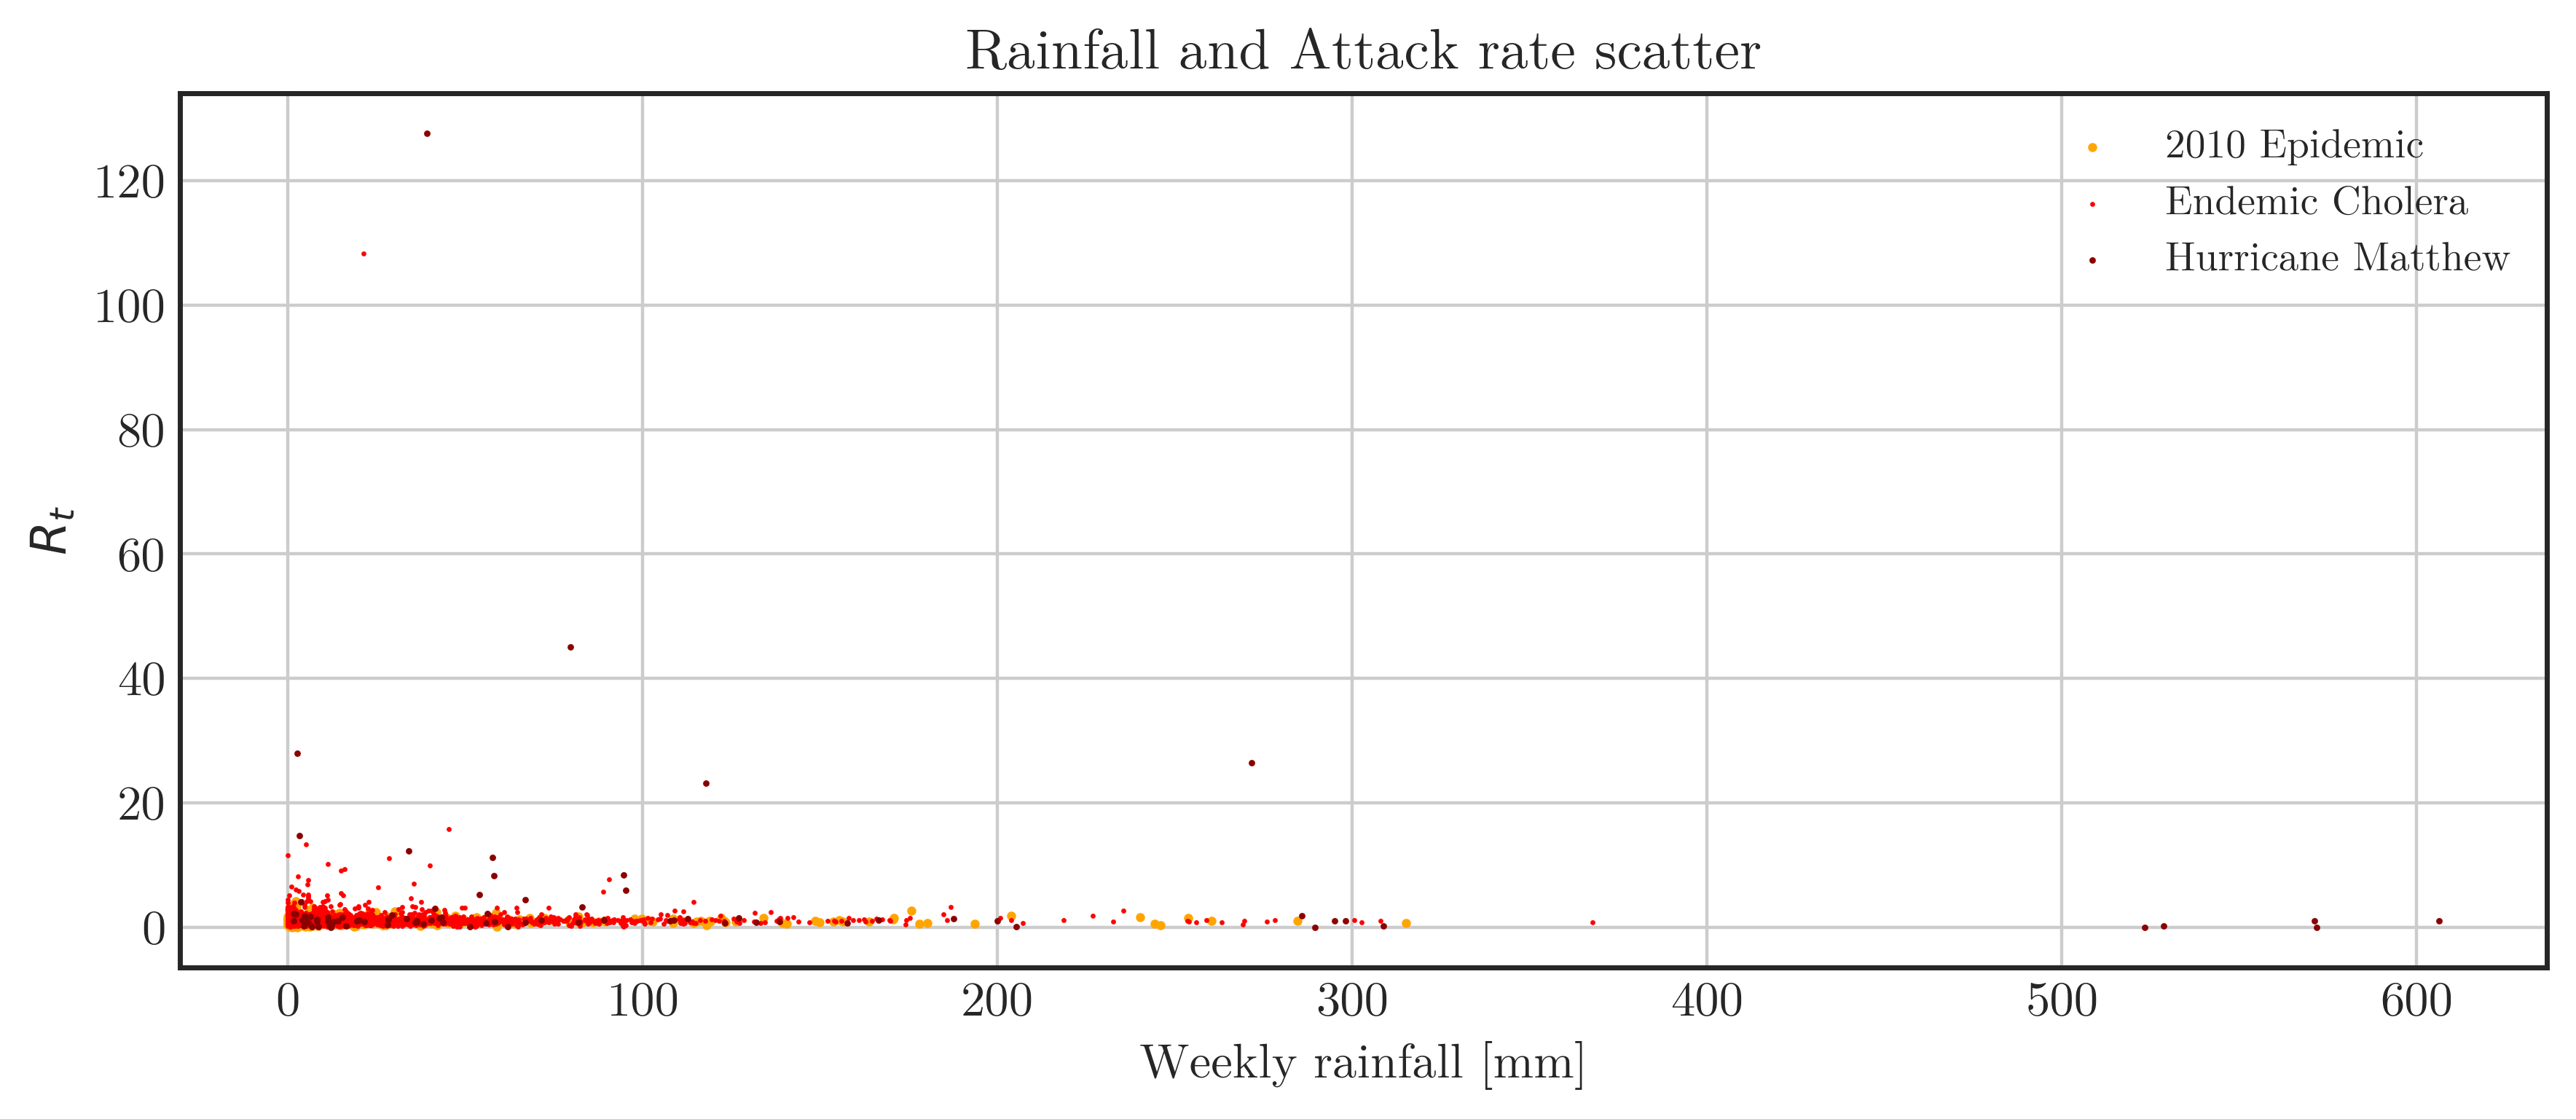

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(9,4), squeeze = True, dpi=400);

ti = t1
tf = t2
ax.set_xlabel(r'Weekly rainfall [mm]')

ax.grid()
ax.set_title('Rainfall and Attack rate scatter', fontsize=14)
ax.set_ylabel(r'$R_t$')

ax.scatter(rain[t0:t1].values, brn[t0:t1].values, color = 'orange', marker = '.', linewidth = .01, label = '2010 Epidemic', s = 20)
ax.scatter(rain[t1:t2].values, brn[t1:t2].values, color = 'red', marker = '.', linewidth = .1, label = 'Endemic Cholera', s=5)
ax.scatter(rain[t2:t3].values, brn[t2:t3].values, color = 'darkred', marker = '.', linewidth = .01, label= 'Hurricane Matthew', s=10)

fig.tight_layout()
#ax.set_xlim(0,100)
#ax.set_ylim(0,5)
ax.legend()